## **Comparative analysis of active vs inactive ligands**

In [1]:
run_all = False

In [2]:
from PLIPAnalyzerV03 import PLIPAnalyzer as pa
from PLIPAnalyzerV03 import Preparation as Prep
from PLIPAnalyzerV03 import Comparison as paComp
prep = Prep()
ligand_metainfo = prep.get_sdf_metainfo("sEH_6hgv_results.sdf")
ligand_names = ligand_metainfo["names"]
ligand_names[:10]

['IA_10|SeH_inactivess_minimized|sdf|1|dock7',
 'IA_10|SeH_inactivess_minimized|sdf|1|dock8',
 'IA_10|SeH_inactivess_minimized|sdf|1|dock4',
 'IA_10|SeH_inactivess_minimized|sdf|1|dock10',
 'IA_10|SeH_inactivess_minimized|sdf|1|dock2',
 'IA_10|SeH_inactivess_minimized|sdf|1|dock1',
 'IA_10|SeH_inactivess_minimized|sdf|1|dock3',
 'IA_10|SeH_inactivess_minimized|sdf|1|dock6',
 'IA_10|SeH_inactivess_minimized|sdf|1|dock5',
 'IA_10|SeH_inactivess_minimized|sdf|1|dock9']

In [3]:
tmp = []
for l_name in ligand_names:
    n = "|".join(l_name.split("|")[:-1])
    tmp.append(n)
unique_names = list(set(tmp))
print(len(tmp), len(unique_names))

2360 236


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

names_train_val, names_test = train_test_split(unique_names, train_size = 0.8, random_state = 42, shuffle = True)
names_train, names_val = train_test_split(names_train_val, train_size = 0.8, random_state = 1337, shuffle = True)

print(len(names_train), len(names_val), len(names_test))
s = """
IA_101.cdx|SeH_inactivess_minimized|sdf|3',
 'A_106|SEH_inhibs_minimized|sdf|8',
 'IA_52.cdx|SeH_inactivess_minimized|sdf|137',
 'IA_14|SeH_inactivess_minimized|sdf|42',
 'IA_111.cdx|SeH_inactivess_minimized|sdf|14',
 'A_49|SEH_inhibs_minimized|sdf|35',
 'IA_208.cdx|SeH_inactivess_minimized|sdf|105',
 'IA_128.cdx|SeH_inactivess_minimized|sdf|29',
 'IA_158.cdx|SeH_inactivess_minimized|sdf|59',
 'IA_109.cdx|SeH_inactivess_minimized|sdf|11',
 'IA_11|SeH_inactivess_minimized|sdf|12',
 'IA_86.cdx|SeH_inactivess_minimized|sdf|164',
 'IA_89.cdx|SeH_inactivess_minimized|sdf|167',
 'IA_189.cdx|SeH_inactivess_minimized|sdf|89',
 'IA_53.cdx|SeH_inactivess_minimized|sdf|138',
 'IA_119.cdx|SeH_inactivess_minimized|sdf|21',
 'A_48|SEH_inhibs_minimized|sdf|34',
 'IA_178.cdx|SeH_inactivess_minimized|sdf|79',
"""
names_train[:10]

150 38 48


['IA_105.cdx|SeH_inactivess_minimized|sdf|7',
 'IA_161.cdx|SeH_inactivess_minimized|sdf|63',
 'A_117|SEH_inhibs_minimized|sdf|10',
 'IA_186.cdx|SeH_inactivess_minimized|sdf|86',
 'IA_163.cdx|SeH_inactivess_minimized|sdf|65',
 'IA_134.cdx|SeH_inactivess_minimized|sdf|36',
 'IA_178.cdx|SeH_inactivess_minimized|sdf|79',
 'A_76|SEH_inhibs_minimized|sdf|46',
 'IA_39|SeH_inactivess_minimized|sdf|125',
 'IA_15|SeH_inactivess_minimized|sdf|51']

In [17]:
if run_all:
    p = Prep()
    # clean PDB file
    pdb = p.remove_ligands("6hgv.pdb", "6hgv_cleaned.pdb")
    # read ligands from docking SDF file
    ligands = p.get_ligands("sEH_6hgv_results.sdf")
    # get ligand names
    sdf_metainfo = p.get_sdf_metainfo("sEH_6hgv_results.sdf")
    ligand_names = sdf_metainfo["names"]
    # write ligands into PDB files
    structures = p.add_ligands_multi("6hgv_cleaned.pdb", "structures", ligands)
    result = pa(structures, ligand_names = ligand_names, poses = "best", path = "current")

In [6]:
import json

if run_all:
    with open("structures.json", "w") as f:
                json.dump(result.pdb_entry_results, f)
                f.close()

    with open("structures_best.json", "w") as f:
                json.dump(result.best_pdb_entries, f)
                f.close()

with open("structures.json", "r", encoding="utf-8") as f:
    pdb_entry_results = json.load(f)
    f.close()
    
with open("structures_best.json", "r", encoding="utf-8") as f:
    best_pdb_entries = json.load(f)
    f.close()

In [7]:
entries_train = []
entries_train_keys = []
entries_val = []
entries_test = []
for entry in best_pdb_entries:
    l_name = pdb_entry_results[entry]["ligand_name"]
    l_name_short = "|".join(l_name.split("|")[:-1])
    if l_name_short in names_train:
        entries_train.append(pdb_entry_results[entry])
        entries_train_keys.append(entry)
    elif l_name_short in names_val:
        entries_val.append(pdb_entry_results[entry])
    elif l_name_short in names_test:
        entries_test.append(pdb_entry_results[entry])
    else:
        print(l_name_short + " not in any list!")
        
print(len(entries_train), len(entries_val), len(entries_test))

150 38 48


In [8]:
training_interactions = []
for entry in entries_train:
    interactions = entry["interactions"]
    for sb in interactions["Salt_Bridges"]:
        training_interactions.append("Salt_Bridge:" + sb)
    for hb in interactions["Hydrogen_Bonds"]:
        training_interactions.append("Hydrogen_Bond:" + hb)
    for ps in interactions["Pi_Stacking"]:
        training_interactions.append("Pi-Stacking:" + ps)
    for pc in interactions["Pi_Cation_Interactions"]:
        training_interactions.append("Pi-Cation_Interaction:" + pc)
    for hab in interactions["Halogen_Bonds"]:
        training_interactions.append("Halogen_Bond:" + hab)
    for wb in interactions["Water_Bridges"]:
        training_interactions.append("Water_Bridge:" + wb)
    for mc in interactions["Metal_Complexes"]:
        training_interactions.append("Metal_Complex:" + mc)
interactions_train = list(set(training_interactions)) 

In [9]:
interactions_train

['Halogen_Bond:TYR383A',
 'Pi-Cation_Interaction:HIS524A',
 'Hydrogen_Bond:TYR383A',
 'Hydrogen_Bond:LEU499A',
 'Halogen_Bond:THR360A',
 'Halogen_Bond:MET469A',
 'Halogen_Bond:SER370A',
 'Hydrogen_Bond:TRP336A',
 'Water_Bridge:ALA365A',
 'Salt_Bridge:HIS524A',
 'Water_Bridge:LEU408A',
 'Hydrogen_Bond:TRP525A',
 'Hydrogen_Bond:LEU408A',
 'Hydrogen_Bond:PHE497A',
 'Halogen_Bond:SER412A',
 'Pi-Cation_Interaction:TRP336A',
 'Halogen_Bond:LEU408A',
 'Halogen_Bond:PHE267A',
 'Hydrogen_Bond:ASN366A',
 'Water_Bridge:PHE267A',
 'Hydrogen_Bond:SER374A',
 'Water_Bridge:TRP525A',
 'Hydrogen_Bond:ASN472A',
 'Halogen_Bond:ASP496A',
 'Hydrogen_Bond:HIS524A',
 'Pi-Stacking:HIS524A',
 'Hydrogen_Bond:PHE267A',
 'Hydrogen_Bond:ILE363A',
 'Water_Bridge:TYR343A',
 'Water_Bridge:HIS524A',
 'Hydrogen_Bond:VAL498A',
 'Halogen_Bond:LEU417A',
 'Hydrogen_Bond:GLN384A',
 'Hydrogen_Bond:ASP496A',
 'Water_Bridge:ASP335A',
 'Halogen_Bond:ASN468A',
 'Water_Bridge:ASN472A',
 'Pi-Stacking:TYR383A',
 'Hydrogen_Bond:PRO3

In [10]:
data_train = {"INDEX": list(range(1, len(entries_train) + 1)), 
              "NAME": ["dummy_name" for entry in entries_train]}
for i in interactions_train:
    data_train[i] = [0 for entry in entries_train]

for i, entry in enumerate(entries_train):
    data_train["NAME"][i] = "|".join(entry["ligand_name"].split("|")[:-1])
    interactions = entry["interactions"]
    for sb in interactions["Salt_Bridges"]:
        data_train["Salt_Bridge:" + sb][i] = data_train["Salt_Bridge:" + sb][i] + 1
    for hb in interactions["Hydrogen_Bonds"]:
        data_train["Hydrogen_Bond:" + hb][i] = data_train["Hydrogen_Bond:" + hb][i] + 1
    for ps in interactions["Pi_Stacking"]:
        data_train["Pi-Stacking:" + ps][i] = data_train["Pi-Stacking:" + ps][i] + 1
    for pc in interactions["Pi_Cation_Interactions"]:
        data_train["Pi-Cation_Interaction:" + pc][i] = data_train["Pi-Cation_Interaction:" + pc][i] + 1
    for hab in interactions["Halogen_Bonds"]:
        data_train["Halogen_Bond:" + hab][i] = data_train["Halogen_Bond:" + hab][i] + 1
    for wb in interactions["Water_Bridges"]:
        data_train["Water_Bridge:" + wb][i] = data_train["Water_Bridge:" + wb][i] + 1
    for mc in interactions["Metal_Complexes"]:
        data_train["Metal_Complex:" + mc][i] = data_train["Metal_Complex:" + mc][i] + 1
    
df_train = pd.DataFrame(data_train)

def get_label(input):
    
    if "inactive" in input:
        return "inactive"
    else:
        return "active"
    
df_train["LABEL"] = df_train["NAME"].apply(lambda x: get_label(x))

print(df_train.loc[df_train["NAME"] == "dummy_name"].shape[0])

df_train.to_csv("data_train.csv", index = False)

0


In [11]:
data_val = {"INDEX": list(range(1, len(entries_val) + 1)), 
              "NAME": ["dummy_name" for entry in entries_val]}
for i in interactions_train:
    data_val[i] = [0 for entry in entries_val]

for i, entry in enumerate(entries_val):
    data_val["NAME"][i] = "|".join(entry["ligand_name"].split("|")[:-1])
    interactions = entry["interactions"]
    for sb in interactions["Salt_Bridges"]:
        key = "Salt_Bridge:" + sb
        if key in data_val:
            data_val[key][i] = data_val[key][i] + 1
    for hb in interactions["Hydrogen_Bonds"]:
        key = "Hydrogen_Bond:" + hb
        if key in data_val:
            data_val[key][i] = data_val[key][i] + 1
    for ps in interactions["Pi_Stacking"]:
        key = "Pi-Stacking:" + ps
        if key in data_val:
            data_val[key][i] = data_val[key][i] + 1
    for pc in interactions["Pi_Cation_Interactions"]:
        key = "Pi-Cation_Interaction:" + pc
        if key in data_val:
            data_val[key][i] = data_val[key][i] + 1
    for hab in interactions["Halogen_Bonds"]:
        key = "Halogen_Bond:" + hab
        if key in data_val:
            data_val[key][i] = data_val[key][i] + 1
    for wb in interactions["Water_Bridges"]:
        key = "Water_Bridge:" + wb
        if key in data_val:
            data_val[key][i] = data_val[key][i] + 1
    for mc in interactions["Metal_Complexes"]:
        key = "Metal_Complex:" + mc
        if key in data_val:
            data_val[key][i] = data_val[key][i] + 1
    
df_val = pd.DataFrame(data_val)
    
df_val["LABEL"] = df_val["NAME"].apply(lambda x: get_label(x))

print(df_val.loc[df_val["NAME"] == "dummy_name"].shape[0])

df_val.to_csv("data_val.csv", index = False)

0


In [12]:
data_test = {"INDEX": list(range(1, len(entries_test) + 1)), 
              "NAME": ["dummy_name" for entry in entries_test]}
for i in interactions_train:
    data_test[i] = [0 for entry in entries_test]

for i, entry in enumerate(entries_test):
    data_test["NAME"][i] = "|".join(entry["ligand_name"].split("|")[:-1])
    interactions = entry["interactions"]
    for sb in interactions["Salt_Bridges"]:
        key = "Salt_Bridge:" + sb
        if key in data_test:
            data_test[key][i] = data_test[key][i] + 1
    for hb in interactions["Hydrogen_Bonds"]:
        key = "Hydrogen_Bond:" + hb
        if key in data_test:
            data_test[key][i] = data_test[key][i] + 1
    for ps in interactions["Pi_Stacking"]:
        key = "Pi-Stacking:" + ps
        if key in data_test:
            data_test[key][i] = data_test[key][i] + 1
    for pc in interactions["Pi_Cation_Interactions"]:
        key = "Pi-Cation_Interaction:" + pc
        if key in data_test:
            data_test[key][i] = data_test[key][i] + 1
    for hab in interactions["Halogen_Bonds"]:
        key = "Halogen_Bond:" + hab
        if key in data_test:
            data_test[key][i] = data_test[key][i] + 1
    for wb in interactions["Water_Bridges"]:
        key = "Water_Bridge:" + wb
        if key in data_test:
            data_test[key][i] = data_test[key][i] + 1
    for mc in interactions["Metal_Complexes"]:
        key = "Metal_Complex:" + mc
        if key in data_test:
            data_test[key][i] = data_test[key][i] + 1
    
df_test = pd.DataFrame(data_test)
    
df_test["LABEL"] = df_test["NAME"].apply(lambda x: get_label(x))

print(df_test.loc[df_test["NAME"] == "dummy_name"].shape[0])

df_test.to_csv("data_test.csv", index = False)

0


In [13]:
active_structures = []
inactive_structures = []
active_names = []
inactive_names = []

for key in entries_train_keys:
    if "inactive" in pdb_entry_results[key]["ligand_name"]:
        inactive_structures.append(key)
        inactive_names.append(pdb_entry_results[key]["ligand_name"])
    else:
        active_structures.append(key)
        active_names.append(pdb_entry_results[key]["ligand_name"])

In [14]:
print(len(active_structures), len(inactive_structures))

39 111


In [15]:
result_actives = pa(active_structures, ligand_names = active_names, path = "current")

# get result for inactive ligands
result_inactives = pa(inactive_structures, ligand_names = inactive_names, path = "current")

# get comparison
comparison = paComp("Actives", "Inactives", result_actives.i_frequencies, result_inactives.i_frequencies)

Analyzing file:  structures/6hgv_cleaned1956.pdb
Analyzing file:  structures/6hgv_cleaned1991.pdb
Analyzing file:  structures/6hgv_cleaned2062.pdb
Analyzing file:  structures/6hgv_cleaned2075.pdb
Analyzing file:  structures/6hgv_cleaned2243.pdb
Analyzing file:  structures/6hgv_cleaned2302.pdb
Analyzing file:  structures/6hgv_cleaned2043.pdb
Analyzing file:  structures/6hgv_cleaned2206.pdb
Analyzing file:  structures/6hgv_cleaned2329.pdb
Analyzing file:  structures/6hgv_cleaned2351.pdb
Analyzing file:  structures/6hgv_cleaned1879.pdb
Analyzing file:  structures/6hgv_cleaned1884.pdb
Analyzing file:  structures/6hgv_cleaned1923.pdb
Analyzing file:  structures/6hgv_cleaned2060.pdb
Analyzing file:  structures/6hgv_cleaned2111.pdb
Analyzing file:  structures/6hgv_cleaned2195.pdb
Analyzing file:  structures/6hgv_cleaned2284.pdb
Analyzing file:  structures/6hgv_cleaned2008.pdb
Analyzing file:  structures/6hgv_cleaned2130.pdb
Analyzing file:  structures/6hgv_cleaned2135.pdb
Analyzing file:  str

C:\Users\Micha\anaconda3\envs\ProteinDocking\lib\site-packages\plip\basic\supplemental.py:90: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(dm / cm)  # Round here to prevent floating point errors


Analyzing file:  structures/6hgv_cleaned2170.pdb
Analyzing file:  structures/6hgv_cleaned2264.pdb
Analyzing file:  structures/6hgv_cleaned2271.pdb
Analyzing file:  structures/6hgv_cleaned2345.pdb
Analyzing file:  structures/6hgv_cleaned2175.pdb
Analyzing file:  structures/6hgv_cleaned2217.pdb
Analyzing file:  structures/6hgv_cleaned2221.pdb
Analyzing file:  structures/6hgv_cleaned474.pdb
Analyzing file:  structures/6hgv_cleaned113.pdb
Analyzing file:  structures/6hgv_cleaned214.pdb
Analyzing file:  structures/6hgv_cleaned224.pdb
Analyzing file:  structures/6hgv_cleaned426.pdb
Analyzing file:  structures/6hgv_cleaned487.pdb
Analyzing file:  structures/6hgv_cleaned934.pdb
Analyzing file:  structures/6hgv_cleaned980.pdb
Analyzing file:  structures/6hgv_cleaned1061.pdb
Analyzing file:  structures/6hgv_cleaned1144.pdb
Analyzing file:  structures/6hgv_cleaned1420.pdb
Analyzing file:  structures/6hgv_cleaned205.pdb
Analyzing file:  structures/6hgv_cleaned697.pdb
Analyzing file:  structures/6h

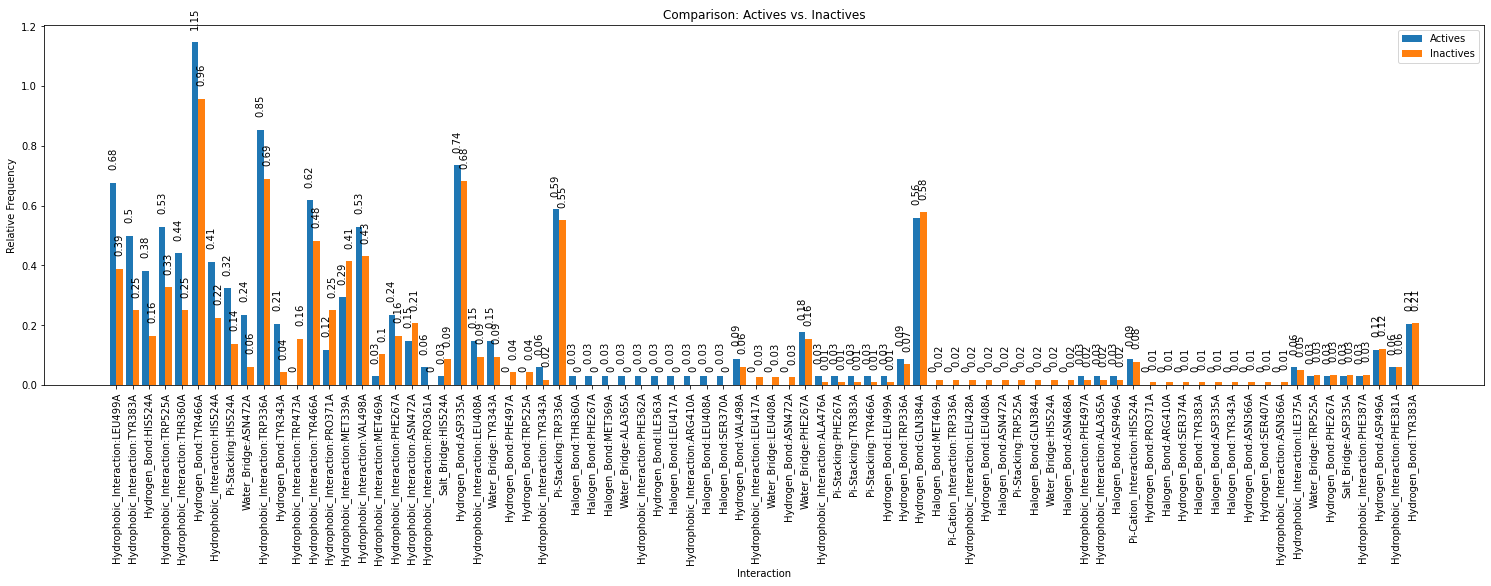

In [16]:
comparison.plot();

In [17]:
comparison.comparison

{'Hydrophobic_Interaction:LEU499A': {'difference': 0.28853955375253537,
  'Actives': 0.6764705882352942,
  'Inactives': 0.3879310344827588},
 'Hydrophobic_Interaction:TYR383A': {'difference': 0.2500000000000001,
  'Actives': 0.5,
  'Inactives': 0.2499999999999999},
 'Hydrogen_Bond:HIS524A': {'difference': 0.21855983772819476,
  'Actives': 0.3823529411764706,
  'Inactives': 0.16379310344827586},
 'Hydrophobic_Interaction:TRP525A': {'difference': 0.2018255578093306,
  'Actives': 0.5294117647058824,
  'Inactives': 0.32758620689655177},
 'Hydrophobic_Interaction:THR360A': {'difference': 0.19117647058823545,
  'Actives': 0.44117647058823534,
  'Inactives': 0.2499999999999999},
 'Hydrogen_Bond:TYR466A': {'difference': 0.190162271805275,
  'Actives': 1.1470588235294112,
  'Inactives': 0.9568965517241362},
 'Hydrophobic_Interaction:HIS524A': {'difference': 0.1876267748478703,
  'Actives': 0.411764705882353,
  'Inactives': 0.22413793103448268},
 'Pi-Stacking:HIS524A': {'difference': 0.185598377

In [18]:
for i in interactions_train:
    if i not in comparison.comparison:
        print(i)